# No supervisado datos
* Utilizar PCA, para observar los datos
* Utilizar K-means para agrupar los datos
* Utilizar PCA y Cluster para entender nuestros datos o generar etiquetas

In [1]:
! pip install numpy pandas plotly scipy kaleido

In [2]:
import numpy as np
import os
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tarfile
import zipfile
from sklearn.cluster import AgglomerativeClustering
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
from IPython.display import Image 
import plotly.figure_factory as ff
import plotly.express as px

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

## PCA
* Cuales modelos son similares?

In [3]:
global static_img
static_img=True
def display_static(fig):
    if static_img:
        return Image(fig.to_image(format="png"))
    else:
        return fig
    

In [4]:
df = pd.read_csv("data/CARS.csv")
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [5]:
df.describe(include="all")

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,C240 4dr,Sedan,Asia,Front,"$31,545",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,NaN,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,NaN,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


In [6]:
pca = PCA(n_components=2)
X = df[["EngineSize","Cylinders","Horsepower","MPG_City","MPG_Highway","Weight","Wheelbase","Length"]].fillna(0)
# center, remove mean
#X = X.sub(X.mean(axis=0), axis=1)
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)
pca.fit(X_sc)

PCA(n_components=2)

In [7]:
pca.components_

array([[-0.38777255, -0.36326891, -0.33140171,  0.35867452,  0.35957626,
        -0.38389832, -0.32249629, -0.31387383],
       [ 0.08763927,  0.18034495,  0.39715417, -0.25114062, -0.24366903,
        -0.10688009, -0.57353016, -0.58245791]])

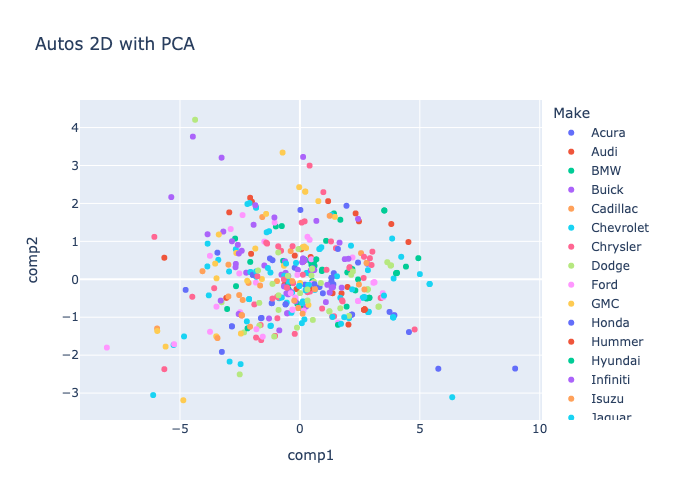

In [8]:
X_hat = pca.transform(X_sc)
df_2d = pd.DataFrame(data=X_hat,columns=["comp1","comp2"])
df_2d["Model"] = df["Model"]
df_2d["Make"] = df["Make"]
fig = px.scatter(df_2d, x="comp1", y="comp2", 
                 color="Make", custom_data=['Make', 'Model'],
                 title="Autos 2D with PCA"
                )
fig.update_traces( hovertemplate='Comp1: %{x} <br>Comp2: %{y} <br>Brand: %{customdata[0]}-%{customdata[1]}')
display(display_static(fig))

In [9]:
# las priemras 2 componentes explican 84% de la varianza d elos datos
print(pca.explained_variance_ratio_)

[0.71064877 0.13328633]


In [10]:
# eigen values
pca.explained_variance_

array([5.69850446, 1.06878782])

In [11]:
# eigen vector
pca.components_

array([[-0.38777255, -0.36326891, -0.33140171,  0.35867452,  0.35957626,
        -0.38389832, -0.32249629, -0.31387383],
       [ 0.08763927,  0.18034495,  0.39715417, -0.25114062, -0.24366903,
        -0.10688009, -0.57353016, -0.58245791]])

#### More exmaples on
https://jdramirez.github.io/UCO_ML_AI/PCA.html

## K-Mean
Use k-means to find similar cars

In [84]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_sc)

In [85]:
# centroides
kmeans.cluster_centers_

array([[-1.1175571 , -1.16286836, -1.05154231,  1.21302464,  1.1414147 ,
        -1.10217583, -0.83719832, -0.88653629],
       [-0.15186283, -0.08262071, -0.06282695, -0.15105604, -0.05455511,
        -0.09088182, -0.11567295, -0.03841553],
       [ 1.18079808,  0.89281252,  0.55671532, -0.8891844 , -1.06566823,
         1.51854331,  1.5150616 ,  1.33102836],
       [ 1.25706826,  1.4791274 ,  1.62931818, -0.7220299 , -0.69655741,
         0.54775946,  0.10414987,  0.16551601]])

In [86]:
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 3, 0,
       0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 3, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 3, 3, 3, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 2, 1, 2, 2,
       2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1,
       1, 1, 1, 2, 3, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2,
       2, 1, 3, 3, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 3, 1, 3, 2,
       1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 2, 1, 1, 3, 3, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 3, 0, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 3, 2, 2, 3, 3, 3, 0, 1, 1, 1, 3, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1,

In [87]:
df_2d["labels"] = [str(i) for i in kmeans.labels_] 

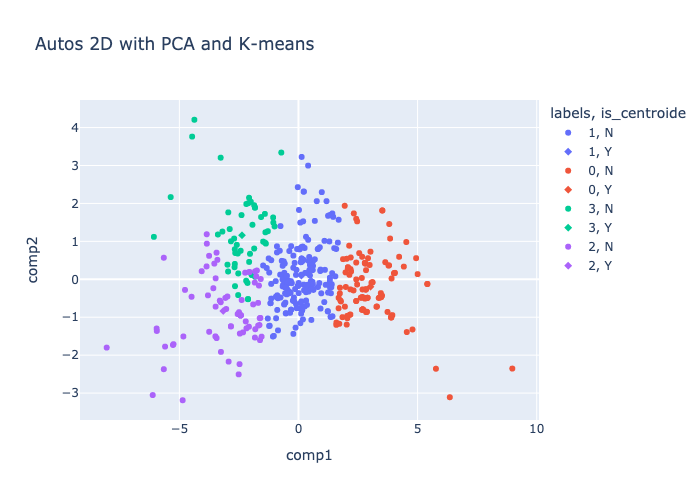

In [88]:
#from PIL import Image
df_2d_centroide = pd.DataFrame(data=pca.transform(kmeans.cluster_centers_), columns=["comp1","comp2"])
df_2d_centroide["is_centroide"] = "Y"
df_2d_centroide["labels"] = [str(i) for i in range(4)]
df_2d["is_centroide"] = "N"
df_2d_w_c = pd.concat((df_2d,df_2d_centroide), axis=0)

fig = px.scatter(df_2d_w_c, x="comp1", y="comp2", 
                 color="labels", custom_data=['Make', 'Model'],
                 symbol="is_centroide",
                 title="Autos 2D with PCA and K-means"
                )
display(Image(fig.to_image(format="png")))

## Dendograma
Cluster haciendo jerarquias

In [89]:
fig = ff.create_dendrogram(X_sc,  labels=(df_2d["Make"] +'-'+ df["Model"]).values)
fig.update_layout(width=5000, height=1000)
fig.show()

In [90]:
model = AgglomerativeClustering( n_clusters=4)
model = model.fit(X_sc)
model.labels_

array([2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 3,
       3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 1, 1, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 0, 0,
       0, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 3,
       3, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 3, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 2, 3, 3,
       1, 1, 1, 3, 3, 1, 3, 2, 2, 0, 0, 3, 0, 2, 1, 1, 1, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 3, 2, 2, 3, 1, 1, 3, 3, 3, 2, 2, 2, 1, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 0, 2,